In [1]:
#Regression with XGBoost
#https://www.datatechnotes.com/2019/06/regression-example-with-xgbregressor-in.html
#also apply the log transform on selectivity labels
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('TrainData.csv')
y = pd.read_csv('selectivity.csv')

In [3]:
X.replace(0.1,0.0,inplace=True)
X.head()

,Elevation LB,Elevation UB,Aspect LB,Aspect UB,Slope LB,Slope UB,Horizontal_Distance_To_Hydrology LB,Horizontal_Distance_To_Hydrology UB,Vertical_Distance_To_Hydrology LB,Vertical_Distance_To_Hydrology UB,Horizontal_Distance_To_Roadways LB,Horizontal_Distance_To_Roadways UB,Hillshade_9am LB,Hillshade_9am UB,Hillshade_Noon LB,Hillshade_Noon UB,Hillshade_3pm LB,Hillshade_3pm UB,Horizontal_Distance_To_Fire_Points LB,Horizontal_Distance_To_Fire_Points UB
0,3396.0,3726.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2645.0,3033.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2131.0,3247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3625.0,3809.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3626.0,3642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#convert to numpy arrays
X = X.values
y = y.values #uaing this for model training

In [5]:
epsilon = 1e-10
y_log = np.log2(y + epsilon) #log transformation of selectivity labels using log base 2.

In [6]:
#using the original selectivity values gives higher error and lower accuracy according to the paper

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size = 0.2) #testing 20%, trainig 80%, y_log gives a better result.

In [8]:
# Instantiate the XGBRegressor with default parameters

xgbr = xgb.XGBRegressor(
    objective='reg:squarederror',  # Specifies the learning task and the objective function
    verbosity=0,  # Controls the level of verbosity (0 for silent)
    random_state=42,  # Seed for random number generation
    learning_rate = 0.5
    
)

print(xgbr)
'''
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}'''

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


'\nparams = {"objective":"reg:squarederror",\'colsample_bytree\': 0.3,\'learning_rate\': 0.1,\n                \'max_depth\': 5, \'alpha\': 10}'

In [9]:
# Fit the model
xgbr.fit(X_train, y_train)
#regressor = xgb.XGBRegressor(**params)
xgbr.fit(X_train, y_train)
t_score = xgbr.score(X_train,y_train)
print("Training Score: ", t_score)

Training Score:  0.9424816324710343


In [10]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.91


In [11]:
# Predict on the test data
y_pred = xgbr.predict(X_test)

# Calculate the loss (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 8.20649181439877


In [12]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)

R-squared Score: 0.907643097817281


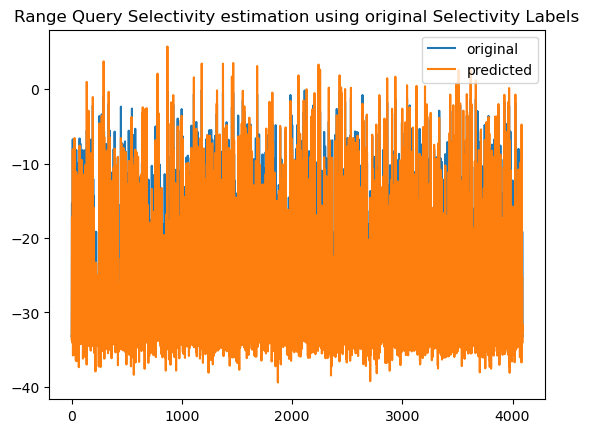

In [13]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Range Query Selectivity estimation using original Selectivity Labels")
plt.legend()
plt.show()

In [14]:
# Define your XGBoost parameters
xgbr_params = {
    'objective': 'reg:squarederror',  # Specifies the learning task and the objective function
    'verbosity': 0,                   # Controls the level of verbosity (0 for silent)
    'random_state': 42,               # Seed for random number generation
    'learning_rate': 0.1              # Learning rate for boosting, controls the step size at each iteration
}

# Iterate over the number of trees (t) as powers of 2
for t in [2**i for i in range(1, 11)]:  # Start from 2, go up to 1024
    # Initialize the maximum number of leaves
    max_leaves = 16 #as the size of the dataset increases, we can increase the number of max_leaves,
    
    # Iterate over the number of leaves (v) as powers of 2
    for v in [2**i for i in range(1, 11)]:  # Start from 2, go up to 1024
        # Update the number of trees and max leaves in the XGBoost parameters
        xgbr_params['n_estimators'] = t
        xgbr_params['max_leaves'] = v
        
        # Create XGBoost Regressor model
        xgbr = xgb.XGBRegressor(**xgbr_params)
        
        # Train the model
        xgbr.fit(X_train, y_train)

In [15]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = xgbr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 1.5085485177655353
Mean Squared Error (MSE): 5.479356125344721
Root Mean Squared Error (RMSE): 2.3408024532934686
R-squared (R2) Score: 0.9383346295667


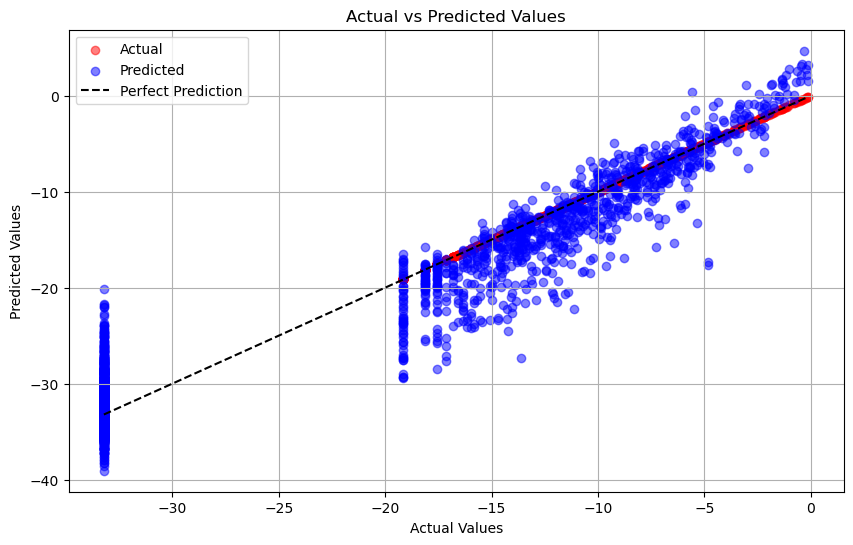

In [16]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values with different colors
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.5)  # Actual values
# Plot predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.5)  # Predicted values

# Plot perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='--', label='Perfect Prediction')  

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


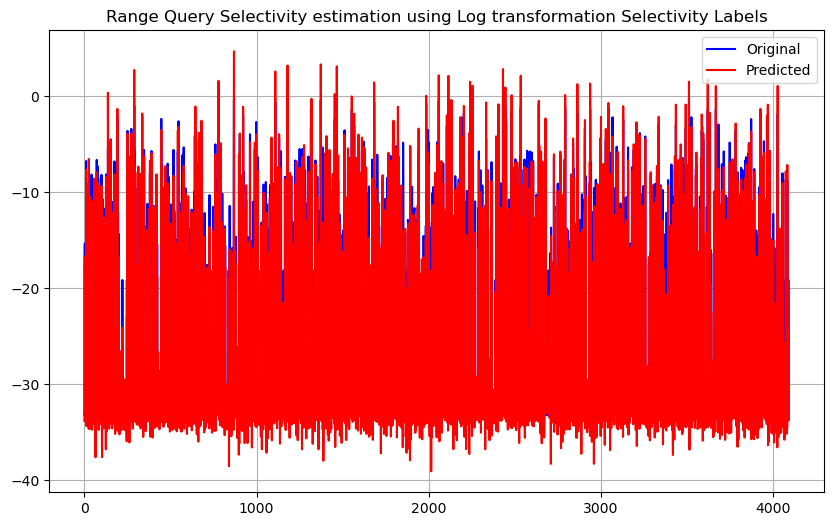

In [17]:
import matplotlib.pyplot as plt

# Create x-axis range
x_ax = range(len(y_test))

# Plot original and predicted values with different colors
plt.figure(figsize=(10, 6))
plt.plot(x_ax, y_test, color='blue', label="Original")  # Plot original values in blue
plt.plot(x_ax, y_pred, color='red', label="Predicted")  # Plot predicted values in red
plt.title("Range Query Selectivity estimation using Log transformation Selectivity Labels")
plt.legend()
plt.grid(True)
plt.show()
